In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab\ Notebooks/aml2024-students-copy/Homeworks/HW2/

/content/drive/MyDrive/Colab Notebooks/aml2024-students-copy/Homeworks/HW2


#  <font color='red'> Bayesian Classification </font>


In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D


import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
import pandas as pd


plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [8, 4]


## Reading the data

In [4]:
data = pd.read_csv('./fishes.csv')
data.head(3)

,Fishtype,lightness,length
0,1.0,2.220252,-1.603168
1,1.0,3.771725,-3.621082
2,1.0,2.898739,-3.625635


## Extracting the different features from the data

In [5]:
# Exctracting the fields with Fishtype=1 (bass)
bass = data[data["Fishtype"] == 1]
basslightness = bass['lightness'].to_numpy()
basslength = bass['length'].to_numpy()
basscount = bass['lightness'].count()

# Exctracting the fields with Fishtype=0 (salmon)
salmon = data[data["Fishtype"] == 0]
salmonlightness = salmon['lightness'].to_numpy()
salmonlength = salmon['length'].to_numpy()
salmoncount = salmon['lightness'].count()
bassfeatures = np.column_stack([basslightness,basslength])
salmonfeatures = np.column_stack([salmonlightness,salmonlength])

print(basscount)
print(salmoncount)

pbass = basscount/(basscount+salmoncount)
psalmon = salmoncount/(basscount+salmoncount)

32304
18203


## Plot the histogram of the two classes

Text(0, 0.5, 'height')

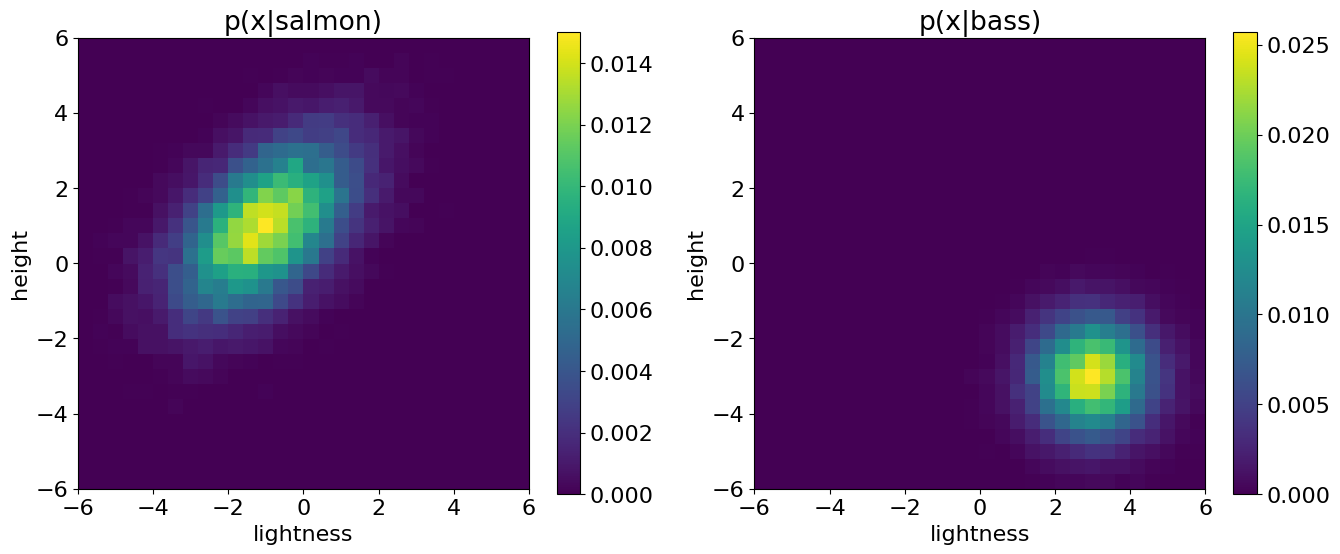

In [6]:
Nbins = 30
lbins = np.linspace(-6,6,Nbins+1)
hbins = np.linspace(-6,6,Nbins+1)

p_x_given_salmon, lbins, hbins = np.histogram2d(salmonfeatures[:,0],salmonfeatures[:,1], bins=(lbins, hbins))
p_x_given_salmon = p_x_given_salmon.T
p_x_given_salmon = p_x_given_salmon/salmoncount

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121, title='p(x|salmon)')
s=plt.imshow(p_x_given_salmon, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')

p_x_given_bass, lbins, hbins = np.histogram2d(bassfeatures[:,0],bassfeatures[:,1], bins=(lbins, hbins))
p_x_given_bass = p_x_given_bass.T
p_x_given_bass = p_x_given_bass/basscount


ax = fig.add_subplot(122, title='p(x|bass)')
s=plt.imshow(p_x_given_bass, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s = plt.colorbar()
plt.xlabel('lightness')
plt.ylabel('height')


In [7]:
x_1,x_2 = np.meshgrid(hbins,lbins)
x_1.shape
x= np.empty(x_1.shape + (2,))
x.shape

(31, 31, 2)

## Determine the linear discriminant that separates the two classes.

Assume that $p({\rm salmon})=p({\rm bass})=\frac{1}{2}$. In this case, the linear discriminant is specified by
$$y(\mathbf x) = 	\underbrace{(\boldsymbol \mu_2-\boldsymbol \mu_1)^T}_{\mathbf w^T} \left(\mathbf x - \underbrace{\frac{(\boldsymbol \mu_2+\boldsymbol \mu_1)}{2}}_{\mathbf b}\right)$$

which can be simplified as $$y(x)=	\underbrace{\begin{bmatrix}w_1&w_2\end{bmatrix}}_{\mathbf w^T} \underbrace{\begin{bmatrix}x_1\\x_2\end{bmatrix}}_{\mathbf x}  - w_{0}$$

Here, $\boldsymbol\mu_2$ and $\boldsymbol\mu_1$ are the means of the 2-D salmon and bass features and $\mathbf x$ is a feature vector.

<font color=red> TODO: Complete the code below to estimate the means and the linear discriminant  </font>

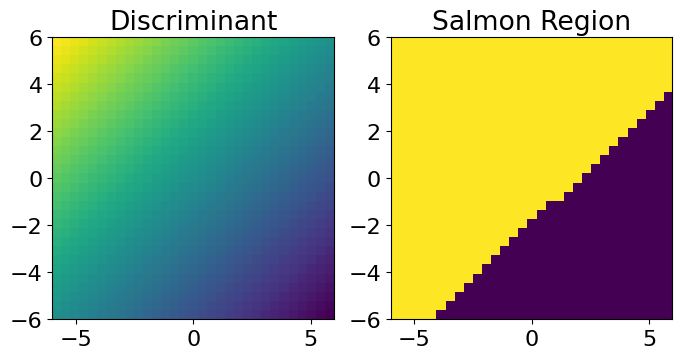

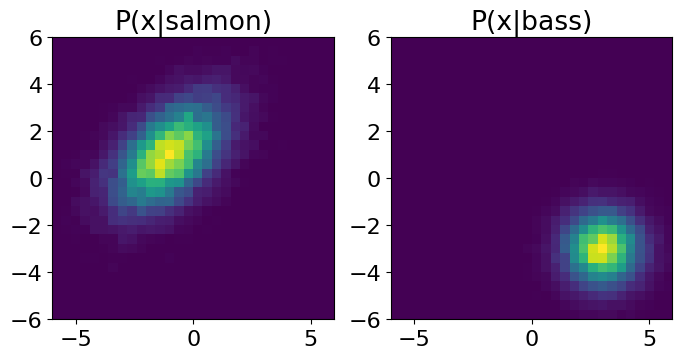

In [9]:

x_1,x_2 = np.meshgrid(hbins,lbins)

# YOUR CODE HERE
# Compute means and evaluate the discriminant
salmon_mean = np.array([[salmon["lightness"].mean(), salmon["length"].mean()]])
bass_mean = np.array([[bass["lightness"].mean(), bass["length"].mean()]])

x_1 = x_1.reshape(-1,1)
x_2 = x_2.reshape(-1,1)

x = np.concatenate((x_1, x_2), axis=1)

discriminant = (x - (salmon_mean + bass_mean)/2) @ (salmon_mean - bass_mean).T
discriminant = discriminant.reshape(31, 31)
SalmonRegion = discriminant > 0

fig,axs  = plt.subplots(1,2)
s=axs[0].imshow(discriminant, interpolation='nearest', origin='lower',extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s=axs[0].set_title('Discriminant')
s=s=axs[1].imshow(SalmonRegion>0, interpolation='nearest', origin='lower',
       extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s=axs[1].set_title('Salmon Region')

fig,axs  = plt.subplots(1,2)
s=axs[0].imshow(p_x_given_salmon, interpolation='nearest', origin='lower',extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s=axs[0].set_title('P(x|salmon)')
s=axs[1].imshow(p_x_given_bass, interpolation='nearest', origin='lower',extent=[lbins[0], lbins[-1], hbins[0], hbins[-1]])
s=axs[1].set_title('P(x|bass)')
